In [4]:
import pandas as pd
import numpy as np
import os
import cv2

In [10]:
path = '/home/mr1142/Documents/Data/NIH'
df = pd.read_csv(os.path.join(path, 'Data_Entry_2017.csv'))
df = df.sample(frac=1).reset_index(drop = True)

In [6]:
random = np.random.randint(0,len(df),300)
df = df.iloc[random].reset_index(drop=True)

In [7]:
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00008824_001.png,No Finding,1,8824,25,M,AP,2500,2048,0.168,0.168,NaN
1,00007762_013.png,Effusion,13,7762,65,M,AP,2500,2048,0.168,0.168,NaN
2,00016231_003.png,Atelectasis|Consolidation|Pneumonia,3,16231,42,M,AP,3056,2544,0.139,0.139,NaN
3,00005216_002.png,No Finding,2,5216,62,F,AP,2500,2048,0.171,0.171,NaN
4,00009963_007.png,No Finding,7,9963,38,M,PA,2992,2991,0.143,0.143,NaN


In [8]:
labels = np.unique(df['Finding Labels'])
labels = '|'.join(labels)
labels = labels.split('|')
labels = np.unique(labels).tolist()

In [9]:
def fill_label(information, label):
    positive_labels = information.split('|')
    if label in positive_labels:
        return 1
    return 0

In [7]:
for lab in labels:
    df[lab] = list(map(lambda x: fill_label(x, lab), df['Finding Labels'].tolist()))

In [8]:
for l in labels:
    print(l)
    print(sum(df[l] == 1))

Atelectasis
24
Cardiomegaly
3
Consolidation
9
Edema
7
Effusion
43
Emphysema
17
Fibrosis
1
Hernia
1
Infiltration
56
Mass
17
No Finding
156
Nodule
15
Pleural_Thickening
9
Pneumonia
8
Pneumothorax
23


In [9]:
list(df['Image Index'])

['00000334_003.png',
 '00003109_011.png',
 '00000976_002.png',
 '00013111_053.png',
 '00007670_015.png',
 '00010871_007.png',
 '00003712_000.png',
 '00011062_012.png',
 '00006642_051.png',
 '00021835_000.png',
 '00009889_034.png',
 '00015530_066.png',
 '00005550_000.png',
 '00009987_005.png',
 '00004514_001.png',
 '00020718_002.png',
 '00019124_078.png',
 '00019087_027.png',
 '00005722_010.png',
 '00009168_003.png',
 '00010060_008.png',
 '00006875_014.png',
 '00004858_045.png',
 '00013969_007.png',
 '00012021_015.png',
 '00005963_014.png',
 '00012532_009.png',
 '00001573_000.png',
 '00002743_001.png',
 '00018829_007.png',
 '00026119_000.png',
 '00000732_006.png',
 '00017972_043.png',
 '00015878_002.png',
 '00009708_000.png',
 '00004808_090.png',
 '00029018_001.png',
 '00007624_043.png',
 '00005002_001.png',
 '00015826_011.png',
 '00025561_003.png',
 '00004186_001.png',
 '00012952_008.png',
 '00014236_002.png',
 '00011460_067.png',
 '00015732_058.png',
 '00018724_038.png',
 '00005069_01

In [10]:
path = '/home/mr1142/Documents/Data/NIH'

In [29]:
def charge_specific_img(img_name):
    subfolders = [f.path for f in os.scandir(path) if f.is_dir()]
    for folder in subfolders:
        img_path = os.path.join(folder, 'images', img_name)
        if os.path.isfile(img_path):
            img = cv2.imread(img_path)
            return img
    img = []
    return img

In [30]:
images = list(map(charge_specific_img, df['Image Index']))

In [32]:
len(images)

300

In [33]:
for i, img in enumerate(images):
    p = os.path.join('/home/mr1142/Documents/Data/segmentation', df['Image Index'][i])
    cv2.imwrite(p, img)

# SECOND

In [18]:
already = ['00000334_003.png',
 '00003109_011.png',
 '00000976_002.png',
 '00013111_053.png',
 '00007670_015.png',
 '00010871_007.png',
 '00003712_000.png',
 '00011062_012.png',
 '00006642_051.png',
 '00021835_000.png',
 '00009889_034.png',
 '00015530_066.png',
 '00005550_000.png',
 '00009987_005.png',
 '00004514_001.png',
 '00020718_002.png',
 '00019124_078.png',
 '00019087_027.png',
 '00005722_010.png',
 '00009168_003.png',
 '00010060_008.png',
 '00006875_014.png',
 '00004858_045.png',
 '00013969_007.png',
 '00012021_015.png',
 '00005963_014.png',
 '00012532_009.png',
 '00001573_000.png',
 '00002743_001.png',
 '00018829_007.png',
 '00026119_000.png',
 '00000732_006.png',
 '00017972_043.png',
 '00015878_002.png',
 '00009708_000.png',
 '00004808_090.png',
 '00029018_001.png',
 '00007624_043.png',
 '00005002_001.png',
 '00015826_011.png',
 '00025561_003.png',
 '00004186_001.png',
 '00012952_008.png',
 '00014236_002.png',
 '00011460_067.png',
 '00015732_058.png',
 '00018724_038.png',
 '00005069_010.png',
 '00003148_011.png',
 '00019348_001.png',
 '00016238_004.png',
 '00012809_000.png',
 '00001143_003.png',
 '00025595_000.png',
 '00013471_023.png',
 '00005537_002.png',
 '00024943_000.png',
 '00007211_000.png',
 '00006411_007.png',
 '00005201_004.png',
 '00008748_012.png',
 '00001986_001.png',
 '00011743_000.png',
 '00011263_000.png',
 '00005066_024.png',
 '00008051_050.png',
 '00005491_000.png',
 '00012901_000.png',
 '00011575_001.png',
 '00000324_002.png',
 '00018262_001.png',
 '00029991_007.png',
 '00009450_001.png',
 '00016587_066.png',
 '00027832_000.png',
 '00000693_004.png',
 '00000798_023.png',
 '00002470_000.png',
 '00011537_000.png',
 '00018103_009.png',
 '00000054_004.png',
 '00013695_003.png',
 '00018972_024.png',
 '00003556_003.png',
 '00027736_003.png',
 '00014626_003.png',
 '00017138_066.png',
 '00019271_067.png',
 '00015693_006.png',
 '00006806_002.png',
 '00014675_010.png',
 '00017537_001.png',
 '00014265_019.png',
 '00028746_000.png',
 '00017318_020.png',
 '00029469_015.png',
 '00025053_000.png',
 '00016350_006.png',
 '00021277_022.png',
 '00025189_007.png',
 '00000231_011.png',
 '00017123_004.png',
 '00006304_044.png',
 '00005695_004.png',
 '00010581_000.png',
 '00024572_000.png',
 '00016932_000.png',
 '00018840_034.png',
 '00026885_000.png',
 '00006319_001.png',
 '00011543_007.png',
 '00007998_001.png',
 '00000787_004.png',
 '00014731_008.png',
 '00004858_001.png',
 '00028589_003.png',
 '00019508_010.png',
 '00013750_024.png',
 '00001616_002.png',
 '00021023_007.png',
 '00016942_008.png',
 '00007650_001.png',
 '00002214_001.png',
 '00020611_001.png',
 '00018921_024.png',
 '00016009_009.png',
 '00005271_006.png',
 '00007658_002.png',
 '00011471_000.png',
 '00011485_000.png',
 '00008894_000.png',
 '00002150_000.png',
 '00027355_002.png',
 '00030223_000.png',
 '00013716_000.png',
 '00012697_008.png',
 '00005712_019.png',
 '00007568_000.png',
 '00004724_006.png',
 '00005862_000.png',
 '00016568_001.png',
 '00008791_001.png',
 '00028395_000.png',
 '00028779_000.png',
 '00021916_007.png',
 '00010741_009.png',
 '00015902_000.png',
 '00014398_005.png',
 '00015094_000.png',
 '00025133_004.png',
 '00009925_041.png',
 '00022192_040.png',
 '00024515_000.png',
 '00029712_000.png',
 '00007848_003.png',
 '00021264_007.png',
 '00019140_001.png',
 '00008698_000.png',
 '00011925_067.png',
 '00006981_001.png',
 '00011302_000.png',
 '00012460_001.png',
 '00012990_002.png',
 '00004006_008.png',
 '00011237_060.png',
 '00009727_013.png',
 '00015606_046.png',
 '00012515_011.png',
 '00011564_004.png',
 '00030306_000.png',
 '00016258_006.png',
 '00018724_008.png',
 '00005768_003.png',
 '00011587_004.png',
 '00002373_001.png',
 '00017258_002.png',
 '00008702_000.png',
 '00029195_000.png',
 '00005729_000.png',
 '00002888_001.png',
 '00001833_003.png',
 '00020595_002.png',
 '00007354_024.png',
 '00011470_004.png',
 '00005466_001.png',
 '00013067_000.png',
 '00007773_000.png',
 '00008008_056.png',
 '00009592_000.png',
 '00008837_000.png',
 '00002321_000.png',
 '00008727_025.png',
 '00009644_003.png',
 '00026911_008.png',
 '00012094_049.png',
 '00006425_010.png',
 '00004625_000.png',
 '00011702_067.png',
 '00029939_000.png',
 '00014203_047.png',
 '00009340_007.png',
 '00022267_007.png',
 '00011355_002.png',
 '00030803_000.png',
 '00022702_002.png',
 '00004571_018.png',
 '00000204_002.png',
 '00019124_027.png',
 '00017324_024.png',
 '00010695_011.png',
 '00022604_030.png',
 '00000217_000.png',
 '00019769_000.png',
 '00006011_000.png',
 '00000459_017.png',
 '00008522_005.png',
 '00018860_000.png',
 '00030319_000.png',
 '00014853_001.png',
 '00012455_002.png',
 '00013922_030.png',
 '00003098_004.png',
 '00005319_000.png',
 '00001961_001.png',
 '00021738_000.png',
 '00014022_102.png',
 '00027765_000.png',
 '00027676_005.png',
 '00008114_001.png',
 '00021215_000.png',
 '00025303_022.png',
 '00018503_000.png',
 '00018157_000.png',
 '00018694_001.png',
 '00020065_007.png',
 '00024675_000.png',
 '00025346_004.png',
 '00025848_000.png',
 '00019283_002.png',
 '00024614_000.png',
 '00018641_003.png',
 '00017424_008.png',
 '00003981_013.png',
 '00013780_000.png',
 '00006249_004.png',
 '00004580_000.png',
 '00022993_015.png',
 '00004893_060.png',
 '00019652_000.png',
 '00001529_004.png',
 '00000202_000.png',
 '00020458_023.png',
 '00004006_014.png',
 '00006602_000.png',
 '00008959_000.png',
 '00026190_005.png',
 '00020170_002.png',
 '00023073_004.png',
 '00012363_002.png',
 '00024706_000.png',
 '00004857_030.png',
 '00021939_004.png',
 '00009813_006.png',
 '00017468_000.png',
 '00008858_002.png',
 '00004534_006.png',
 '00001504_001.png',
 '00001248_037.png',
 '00021277_013.png',
 '00019596_004.png',
 '00020784_000.png',
 '00007780_003.png',
 '00013185_004.png',
 '00025964_002.png',
 '00021201_030.png',
 '00020811_004.png',
 '00029288_001.png',
 '00004309_007.png',
 '00021811_003.png',
 '00020437_016.png',
 '00017733_002.png',
 '00007007_006.png',
 '00017846_001.png',
 '00015014_000.png',
 '00021269_001.png',
 '00015946_002.png',
 '00017106_007.png',
 '00016497_000.png',
 '00022132_002.png',
 '00011968_002.png',
 '00027916_000.png',
 '00025543_013.png',
 '00011022_001.png',
 '00002224_000.png',
 '00008230_000.png',
 '00007520_001.png',
 '00014188_000.png',
 '00005094_019.png',
 '00027196_015.png',
 '00006985_006.png']

In [7]:
path = '/home/mr1142/Documents/Data/NIH'
df = pd.read_csv(os.path.join(path, 'Data_Entry_2017.csv'))
df = df.sample(frac=1).reset_index(drop = True)

In [8]:
random = []
for i in range(300):
    rand=np.random.randint(0,len(df))
    while(df['Image Index'][rand] in already):
        rand=np.random.randint(0,len(df))
    random.append(rand)

NameError: name 'already' is not defined

In [16]:
set(list(df['Image Index'][random])).intersection(already)

set()

In [17]:
df = df.iloc[random].reset_index(drop=True)

In [18]:
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00012047_011.png,Consolidation|Effusion,11,12047,56,F,PA,2642,2991,0.143,0.143,NaN
1,00003378_000.png,Effusion|Pneumothorax,0,3378,65,M,PA,2882,2991,0.143,0.143,NaN
2,00019892_017.png,Effusion|Infiltration,17,19892,59,F,PA,2992,2991,0.143,0.143,NaN
3,00010790_003.png,Infiltration|Pneumothorax,3,10790,55,F,PA,2992,2991,0.143,0.143,NaN
4,00023441_000.png,No Finding,0,23441,27,M,PA,2500,2048,0.168,0.168,NaN


In [19]:
labels = np.unique(df['Finding Labels'])
labels = '|'.join(labels)
labels = labels.split('|')
labels = np.unique(labels).tolist()

In [20]:
def fill_label(information, label):
    positive_labels = information.split('|')
    if label in positive_labels:
        return 1
    return 0

In [21]:
for lab in labels:
    df[lab] = list(map(lambda x: fill_label(x, lab), df['Finding Labels'].tolist()))

In [22]:
for l in labels:
    print(l)
    print(sum(df[l] == 1))

Atelectasis
40
Cardiomegaly
9
Consolidation
12
Edema
4
Effusion
33
Emphysema
5
Fibrosis
1
Infiltration
60
Mass
30
No Finding
151
Nodule
17
Pleural_Thickening
10
Pneumonia
3
Pneumothorax
21


In [23]:
list(df['Image Index'])

['00012047_011.png',
 '00003378_000.png',
 '00019892_017.png',
 '00010790_003.png',
 '00023441_000.png',
 '00010530_011.png',
 '00009584_008.png',
 '00016778_026.png',
 '00003771_001.png',
 '00016963_000.png',
 '00016778_026.png',
 '00011984_004.png',
 '00012047_011.png',
 '00014958_014.png',
 '00008256_003.png',
 '00016550_020.png',
 '00018096_000.png',
 '00017712_000.png',
 '00003990_004.png',
 '00020695_000.png',
 '00016051_002.png',
 '00014839_024.png',
 '00010391_001.png',
 '00029805_002.png',
 '00000230_004.png',
 '00002272_003.png',
 '00028666_001.png',
 '00015584_004.png',
 '00027985_003.png',
 '00021457_032.png',
 '00010530_011.png',
 '00016607_035.png',
 '00017726_005.png',
 '00008859_000.png',
 '00014149_044.png',
 '00026135_002.png',
 '00010945_001.png',
 '00006386_001.png',
 '00008122_004.png',
 '00002759_002.png',
 '00021130_003.png',
 '00006304_043.png',
 '00012602_000.png',
 '00019516_000.png',
 '00016550_020.png',
 '00017192_000.png',
 '00020271_002.png',
 '00008859_00

In [24]:
path = '/home/mr1142/Documents/Data/NIH'

In [10]:
def charge_specific_img(img_name):
    subfolders = [f.path for f in os.scandir(path) if f.is_dir()]
    for folder in subfolders:
        img_path = os.path.join(folder, 'images', img_name)
        if os.path.isfile(img_path):
            img = cv2.imread(img_path)
            return img
    img = []
    return img

In [26]:
images = list(map(charge_specific_img, df['Image Index']))

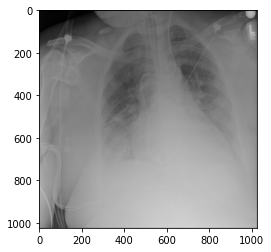

In [57]:
import matplotlib.pyplot as plt
i = np.random.randint(0,len(df))
plt.imshow(images[i])

In [27]:
len(images)

300

In [6]:
for i, img in enumerate(images):
    p = os.path.join('/home/mr1142/Documents/Data/segmentation2', df['Image Index'][i])
    cv2.imwrite(p, img)

NameError: name 'df' is not defined

# SECOND x2

Rehago second porque faltaban imagenes

In [19]:
already_2 = ['00012047_011.png',
 '00003378_000.png',
 '00019892_017.png',
 '00010790_003.png',
 '00023441_000.png',
 '00010530_011.png',
 '00009584_008.png',
 '00016778_026.png',
 '00003771_001.png',
 '00016963_000.png',
 '00016778_026.png',
 '00011984_004.png',
 '00012047_011.png',
 '00014958_014.png',
 '00008256_003.png',
 '00016550_020.png',
 '00018096_000.png',
 '00017712_000.png',
 '00003990_004.png',
 '00020695_000.png',
 '00016051_002.png',
 '00014839_024.png',
 '00010391_001.png',
 '00029805_002.png',
 '00000230_004.png',
 '00002272_003.png',
 '00028666_001.png',
 '00015584_004.png',
 '00027985_003.png',
 '00021457_032.png',
 '00010530_011.png',
 '00016607_035.png',
 '00017726_005.png',
 '00008859_000.png',
 '00014149_044.png',
 '00026135_002.png',
 '00010945_001.png',
 '00006386_001.png',
 '00008122_004.png',
 '00002759_002.png',
 '00021130_003.png',
 '00006304_043.png',
 '00012602_000.png',
 '00019516_000.png',
 '00016550_020.png',
 '00017192_000.png',
 '00020271_002.png',
 '00008859_000.png',
 '00008841_016.png',
 '00019516_000.png',
 '00014677_010.png',
 '00010680_001.png',
 '00000800_000.png',
 '00027304_001.png',
 '00019516_000.png',
 '00003426_019.png',
 '00004215_000.png',
 '00021035_009.png',
 '00027725_049.png',
 '00013471_019.png',
 '00015108_004.png',
 '00013996_004.png',
 '00006067_001.png',
 '00010815_009.png',
 '00028928_000.png',
 '00016801_003.png',
 '00013601_010.png',
 '00018615_016.png',
 '00018523_002.png',
 '00014677_010.png',
 '00027311_003.png',
 '00006941_008.png',
 '00009239_009.png',
 '00006951_003.png',
 '00013141_002.png',
 '00010391_001.png',
 '00003098_011.png',
 '00014839_024.png',
 '00004299_006.png',
 '00018721_008.png',
 '00013282_008.png',
 '00009365_011.png',
 '00002272_003.png',
 '00014839_024.png',
 '00012988_000.png',
 '00030606_011.png',
 '00009689_011.png',
 '00015584_004.png',
 '00022837_004.png',
 '00021976_000.png',
 '00021457_032.png',
 '00019481_000.png',
 '00010905_002.png',
 '00006808_016.png',
 '00013714_006.png',
 '00011950_004.png',
 '00015026_001.png',
 '00016778_026.png',
 '00027784_005.png',
 '00022879_000.png',
 '00009016_000.png',
 '00020695_000.png',
 '00005664_000.png',
 '00009451_002.png',
 '00026135_002.png',
 '00009999_001.png',
 '00018096_000.png',
 '00016101_000.png',
 '00012047_011.png',
 '00020725_032.png',
 '00030481_001.png',
 '00017548_000.png',
 '00025849_049.png',
 '00020271_002.png',
 '00021457_024.png',
 '00015108_004.png',
 '00016101_000.png',
 '00022815_016.png',
 '00005176_020.png',
 '00009863_034.png',
 '00014853_003.png',
 '00009929_000.png',
 '00003378_000.png',
 '00005176_020.png',
 '00027534_000.png',
 '00016778_026.png',
 '00000522_000.png',
 '00012161_000.png',
 '00020805_001.png',
 '00027533_000.png',
 '00001851_001.png',
 '00006386_001.png',
 '00012602_000.png',
 '00029088_002.png',
 '00004525_005.png',
 '00030019_000.png',
 '00020695_000.png',
 '00029088_002.png',
 '00026451_037.png',
 '00013141_002.png',
 '00003083_002.png',
 '00021725_001.png',
 '00023162_001.png',
 '00003702_000.png',
 '00019961_000.png',
 '00009362_000.png',
 '00014958_014.png',
 '00010790_003.png',
 '00003419_000.png',
 '00009689_011.png',
 '00005066_048.png',
 '00014149_044.png',
 '00019545_001.png',
 '00029631_001.png',
 '00019664_003.png',
 '00017503_004.png',
 '00004153_001.png',
 '00020271_002.png',
 '00005176_020.png',
 '00011984_004.png',
 '00011338_000.png',
 '00012127_000.png',
 '00028687_000.png',
 '00028357_013.png',
 '00001989_003.png',
 '00025300_001.png',
 '00010146_005.png',
 '00020945_048.png',
 '00016778_026.png',
 '00011984_004.png',
 '00000522_000.png',
 '00012988_000.png',
 '00024731_000.png',
 '00008122_004.png',
 '00016797_000.png',
 '00008256_003.png',
 '00010189_000.png',
 '00003528_065.png',
 '00019892_017.png',
 '00022192_003.png',
 '00017790_001.png',
 '00012457_000.png',
 '00025096_000.png',
 '00025096_000.png',
 '00018044_026.png',
 '00027165_000.png',
 '00008978_003.png',
 '00004153_001.png',
 '00014996_003.png',
 '00015584_004.png',
 '00029705_003.png',
 '00010146_005.png',
 '00016410_057.png',
 '00016963_000.png',
 '00012927_009.png',
 '00022058_001.png',
 '00012127_000.png',
 '00028357_013.png',
 '00006875_027.png',
 '00010945_001.png',
 '00010530_011.png',
 '00009999_001.png',
 '00006386_001.png',
 '00019664_003.png',
 '00005393_003.png',
 '00011338_000.png',
 '00026865_002.png',
 '00030481_001.png',
 '00019545_001.png',
 '00027725_049.png',
 '00029631_001.png',
 '00005157_000.png',
 '00003327_000.png',
 '00022837_004.png',
 '00013673_004.png',
 '00011702_020.png',
 '00015275_014.png',
 '00021976_000.png',
 '00021457_024.png',
 '00027326_000.png',
 '00020405_037.png',
 '00021201_025.png',
 '00014429_016.png',
 '00009468_000.png',
 '00006386_001.png',
 '00015914_000.png',
 '00009670_000.png',
 '00010189_000.png',
 '00008122_004.png',
 '00027784_005.png',
 '00028687_000.png',
 '00009189_000.png',
 '00012161_000.png',
 '00016508_023.png',
 '00003426_019.png',
 '00015108_004.png',
 '00003861_002.png',
 '00004153_001.png',
 '00016410_057.png',
 '00015908_000.png',
 '00010790_003.png',
 '00010967_009.png',
 '00018615_016.png',
 '00002529_027.png',
 '00010530_011.png',
 '00016291_007.png',
 '00009365_011.png',
 '00018936_002.png',
 '00018721_008.png',
 '00017503_004.png',
 '00007924_001.png',
 '00012602_000.png',
 '00006067_001.png',
 '00008978_003.png',
 '00020805_001.png',
 '00010815_009.png',
 '00025096_000.png',
 '00003098_011.png',
 '00003861_002.png',
 '00015000_010.png',
 '00009710_002.png',
 '00003548_007.png',
 '00015914_000.png',
 '00029705_003.png',
 '00009689_011.png',
 '00000468_055.png',
 '00021035_009.png',
 '00013641_001.png',
 '00009710_002.png',
 '00011156_006.png',
 '00011962_000.png',
 '00000468_055.png',
 '00029088_002.png',
 '00028457_011.png',
 '00016291_007.png',
 '00018615_016.png',
 '00018029_000.png',
 '00002759_002.png',
 '00030019_000.png',
 '00005176_020.png',
 '00016550_020.png',
 '00008522_010.png',
 '00013410_000.png',
 '00021307_018.png',
 '00013410_000.png',
 '00001996_011.png',
 '00016801_003.png',
 '00003548_007.png',
 '00023162_027.png',
 '00004925_007.png',
 '00010801_003.png',
 '00014223_011.png',
 '00016937_001.png',
 '00011702_020.png',
 '00013141_002.png',
 '00015000_010.png',
 '00010680_001.png',
 '00004808_099.png',
 '00006158_001.png',
 '00025285_003.png']

In [11]:
images = list(map(charge_specific_img, images))

In [17]:
for i, img in enumerate(images):
    p = os.path.join('/home/mr1142/Documents/Data/segmentation2', already_2[i])
    cv2.imwrite(p, img)

/home/mr1142/Documents/Data/segmentation2/00012047_011.png
/home/mr1142/Documents/Data/segmentation2/00003378_000.png
/home/mr1142/Documents/Data/segmentation2/00019892_017.png
/home/mr1142/Documents/Data/segmentation2/00010790_003.png
/home/mr1142/Documents/Data/segmentation2/00023441_000.png
/home/mr1142/Documents/Data/segmentation2/00010530_011.png
/home/mr1142/Documents/Data/segmentation2/00009584_008.png
/home/mr1142/Documents/Data/segmentation2/00016778_026.png
/home/mr1142/Documents/Data/segmentation2/00003771_001.png
/home/mr1142/Documents/Data/segmentation2/00016963_000.png
/home/mr1142/Documents/Data/segmentation2/00016778_026.png
/home/mr1142/Documents/Data/segmentation2/00011984_004.png
/home/mr1142/Documents/Data/segmentation2/00012047_011.png
/home/mr1142/Documents/Data/segmentation2/00014958_014.png
/home/mr1142/Documents/Data/segmentation2/00008256_003.png
/home/mr1142/Documents/Data/segmentation2/00016550_020.png
/home/mr1142/Documents/Data/segmentation2/00018096_000.p

In [24]:
path = '/home/mr1142/Documents/Data/NIH'
df = pd.read_csv(os.path.join(path, 'Data_Entry_2017.csv'))
df = df.sample(frac=1).reset_index(drop = True)

In [27]:
already = already + already_2

In [28]:
random = []
for i in range(300):
    rand=np.random.randint(0,len(df))
    while(df['Image Index'][rand] in already):
        rand=np.random.randint(0,len(df))
    random.append(rand)

In [29]:
set(list(df['Image Index'][random])).intersection(already)

set()

In [30]:
df = df.iloc[random].reset_index(drop=True)

In [31]:
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00017678_000.png,No Finding,0,17678,40,F,AP,2500,2048,0.168000,0.168000,NaN
1,00016785_000.png,No Finding,0,16785,43,F,PA,2514,2621,0.143000,0.143000,NaN
2,00017207_003.png,No Finding,3,17207,57,M,AP,2500,2048,0.168000,0.168000,NaN
3,00030198_000.png,Infiltration,0,30198,28,M,PA,1940,2021,0.194311,0.194311,NaN
4,00007431_004.png,No Finding,4,7431,56,F,AP,2904,2544,0.139000,0.139000,NaN


In [32]:
labels = np.unique(df['Finding Labels'])
labels = '|'.join(labels)
labels = labels.split('|')
labels = np.unique(labels).tolist()

In [33]:
def fill_label(information, label):
    positive_labels = information.split('|')
    if label in positive_labels:
        return 1
    return 0

In [34]:
for lab in labels:
    df[lab] = list(map(lambda x: fill_label(x, lab), df['Finding Labels'].tolist()))

In [35]:
for l in labels:
    print(l)
    print(sum(df[l] == 1))

Atelectasis
34
Cardiomegaly
9
Consolidation
10
Edema
6
Effusion
32
Emphysema
7
Fibrosis
5
Hernia
1
Infiltration
72
Mass
13
No Finding
158
Nodule
11
Pleural_Thickening
16
Pneumonia
2
Pneumothorax
14


In [36]:
list(df['Image Index'])

['00017678_000.png',
 '00016785_000.png',
 '00017207_003.png',
 '00030198_000.png',
 '00007431_004.png',
 '00012787_003.png',
 '00013599_000.png',
 '00017712_003.png',
 '00005609_003.png',
 '00001620_004.png',
 '00020945_023.png',
 '00009707_000.png',
 '00007855_001.png',
 '00014083_014.png',
 '00011621_000.png',
 '00011504_017.png',
 '00013704_002.png',
 '00018829_018.png',
 '00006212_006.png',
 '00012299_002.png',
 '00025143_000.png',
 '00021127_010.png',
 '00019031_002.png',
 '00023540_000.png',
 '00009800_000.png',
 '00030323_032.png',
 '00011553_040.png',
 '00029134_003.png',
 '00020683_001.png',
 '00014906_004.png',
 '00018055_046.png',
 '00010659_000.png',
 '00025543_020.png',
 '00000348_004.png',
 '00020043_000.png',
 '00020322_005.png',
 '00019707_014.png',
 '00007374_000.png',
 '00000621_006.png',
 '00017766_000.png',
 '00003523_005.png',
 '00007028_000.png',
 '00004569_004.png',
 '00001517_007.png',
 '00012158_009.png',
 '00013407_000.png',
 '00008701_035.png',
 '00008760_00

In [37]:
path = '/home/mr1142/Documents/Data/NIH'

In [38]:
def charge_specific_img(img_name):
    subfolders = [f.path for f in os.scandir(path) if f.is_dir()]
    for folder in subfolders:
        img_path = os.path.join(folder, 'images', img_name)
        if os.path.isfile(img_path):
            img = cv2.imread(img_path)
            return img
    img = []
    return img

In [39]:
images = list(map(charge_specific_img, df['Image Index']))

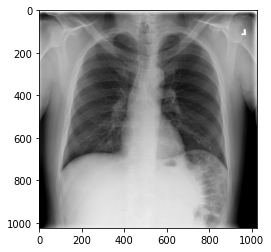

In [40]:
import matplotlib.pyplot as plt
i = np.random.randint(0,len(df))
plt.imshow(images[i])

In [41]:
len(images)

300

In [45]:
for i, img in enumerate(images):
    p = os.path.join('/home/mr1142/Documents/Data/segmentation3', df['Image Index'][i])
    print(p)
    cv2.imwrite(p, img)

/home/mr1142/Documents/Data/segmentation3/00017678_000.png
/home/mr1142/Documents/Data/segmentation3/00016785_000.png
/home/mr1142/Documents/Data/segmentation3/00017207_003.png
/home/mr1142/Documents/Data/segmentation3/00030198_000.png
/home/mr1142/Documents/Data/segmentation3/00007431_004.png
/home/mr1142/Documents/Data/segmentation3/00012787_003.png
/home/mr1142/Documents/Data/segmentation3/00013599_000.png
/home/mr1142/Documents/Data/segmentation3/00017712_003.png
/home/mr1142/Documents/Data/segmentation3/00005609_003.png
/home/mr1142/Documents/Data/segmentation3/00001620_004.png
/home/mr1142/Documents/Data/segmentation3/00020945_023.png
/home/mr1142/Documents/Data/segmentation3/00009707_000.png
/home/mr1142/Documents/Data/segmentation3/00007855_001.png
/home/mr1142/Documents/Data/segmentation3/00014083_014.png
/home/mr1142/Documents/Data/segmentation3/00011621_000.png
/home/mr1142/Documents/Data/segmentation3/00011504_017.png
/home/mr1142/Documents/Data/segmentation3/00013704_002.p